<h1><center>Airbnb Price Prediction</center></h1>

# Project Overview

Airbnb is a short-term home and apartment rental platform that has boomed in recent years, allowing people to rent their properties for both the short and long term. Airbnb presents travelers with many options by providing different parameters, but not much functionality is provided to the hosts/homeowners to determine the listing prices. In this project, we think from the homeowner's perspective, analyze the factors influencing the price, and help them choose the best nightly price. We will analyze multiple data sets collected from insideAirbnb, including parameters like availability, neighbors, room types, fees, and more. In addition, we will explore the guest reviews and impact of the reviews on Airbnb rentals to help hosts make better decisions. 

**Questions of Interest:**


●	How can we help Airbnb hosts to determine the optimum nightly price for their listings?

●	What are the various factors which affect the price of an Airbnb listing?

●	How does the accessibility to various amenities affect the price of Airbnb listings?

●	~~How has the Airbnb market been affected since the pandemic?~~ 

●	What are the various factors which affect the reviews? What insights can we gain from them?

The dataset that we picked for our project contains data from September 2021 to September 2022. After analyzing the dataset, we realized we do not have enough information to demonstrate how the pandemic has affected Airbnb in Amsterdam. For that analysis, we would need data from the end of the year 2020 to 2021. We have also noticed that there is a lot of data regarding the guest review. So we have added a new question of interest where we will try to analyze all the reviews, what parameters affect them, and what insights we can gain from them.



# Milestones and Progress

| Updated Tasks      | Task Lead |  Updated Due Date | Status | Comments
| ----------- | ----------- | ----------- | ----------- | -----------|
|Preparing dataset, data description and loading data | Mozi | Oct 23rd | Completed | 
| Cleaning free text and irrelevant columns | Fabienne  | Oct 24th | Completed | Analyzed the data and discussed collectively regarding which columns would be considered as free text columns and which columns were not relevant for our analysis |
| Discussion on dataset and distribution of remaining columns among team members | Neha  | Oct 27th | Completed | Distributed the remaining columns amongst each member so that each member can separately analyze the columns assigned to them and propose various methods of cleaning the data |
| Preparing data cleanup strategy (all members) | Surbhi | Oct 30th | Completed | After the previous task, each member explained what needs to be cleaned in the columns assigned to them and how they propose to acheive the same. The rest of the team pitched in the possible solutions as well and the most optimum solution was selected for each column. |
| Transforming the data (all members) | Ziqi | Nov 7th | Completed | The solutions discussed in the previous task were implemented by each member of the team on their respective columns. |
| Decide on how to transform data for remaining two columns (beds and bedrooms) | Ziqi | Nov 7th | In Progress | A task lead has been assigned to this, and we are looking into the Airbnb website to find out how the missing values can be replaced | 
| Data wrangling | Tanisha  | Nov 7th | Cancelled | Data wrangling is covered in the previous step |  
| Combine all the files into a single data set | Mozi | Oct 24th  | Rejected | After analyzing the dataset, we decided to prcoess the files separately, so this milestone is no longer valid |
| Add Markdown cells and Comments in the notebook | Tanisha  | Nov 10th | Completed |


Our next big milestones include preparing data for machine learning, implementing the model and creating visualizations. We are yet to decide which model to implement. 

# Next Steps

The next steps tha the team plans on accomplishing are:
- **Data Visualization**
    - We are clear about the story that we want to tell through our visualizations but are still unclear regarding the type of visualization we should be using to acheive the same. We have assigned different types of visualizations to each member so that we can find the perfect types of charts to accurately describe the story we want to tell. 
- **Machine Learning**
    - Convert categorical text data into model-understandable numerical data: Label Encoding and One-hot Encoding
    - Build model: regression model since the output is continuous. We are currently unclear regarding the exact model we will be using so we have assigned team members to research and explore the various models to find the one that would help us acheive our goal of predicting the optimum listing prices. 
    - Evaluate Performance: We plan on evaluating the performance of the models that we short list in the previous step. 
    - Improve model: Tune hyperparameters

# Data Acquisition and Cleaning Code

We used datasets from the website [Inside Airbnb](http://insideairbnb.com/), which scrapes Airbnb listings, calendars, reviews, geographic data, etc., from the listings available on the Airbnb website. We have used the dataset on Amsterdam, and their data was last scraped on September 7th, 2021. Airbnb has not been in a favorable position in Amsterdam, unlike other cities. Hence, we decided to analyze this specific dataset and help the hosts gain some insights into the business. 
We are mainly focusing on the listings and reviews datasets for cleaning as these datasets contain all the necessary data required for our analysis. Each row in the listings dataset represents an available listing in Amsterdam, and the columns refer to the characteristics of the listings. Each row in the reviews dataset refers to a specific review, and the columns contain information related to the corresponding review. The data has certain limitations and needs a lot of cleaning and transformation to be used in the analysis. 
- Since we will not be doing sentiment analysis, we cleaned all the free text columns and other columns unrelated to the project, for example, listing_url, scrape_id, last_scraped, name, description, neighborhood_overview, picture_url, host_url, calendar_updated, calendar_last_scraped, etc. 
- We dropped the columns which had no data by listing the count of null values in each column.
- After further analysis, we noticed that some of the columns have only one value. We created histograms of the remaining columns to identify them and removed these columns as they do not add additional insights to our analysis.
- We transformed the data in the remaining columns depending on the characteristics of the data and dropped columns that were later found to have insufficient data.

### Importing libraries and loading data 

We will import all the required libraries before starting the analysis. Then we will load the listings data to a dataframe. 

In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
path = 'dataset/'
listings_full_df = pd.read_csv(path + 'listings.csv')
listings_full_df

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20210907032724,2021-09-07,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,...,4.97,4.68,4.81,0363 5F3A 5684 6750 D14D,t,1,0,1,0,2.86
1,20168,https://www.airbnb.com/rooms/20168,20210907032724,2021-09-07,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,...,4.62,4.87,4.49,0363 CBB3 2C10 0C2A 1E29,t,2,0,2,0,3.64
2,25428,https://www.airbnb.com/rooms/25428,20210907032724,2021-09-07,"Lovely, sunny 1 bed apt in Ctr (w.lift) & firepl.",Lovely apt in Centre ( lift & fireplace) near ...,NaN,https://a0.muscache.com/pictures/138431/7079a9...,56142,https://www.airbnb.com/users/show/56142,...,5.00,5.00,4.80,NaN,f,1,1,0,0,0.11
3,27886,https://www.airbnb.com/rooms/27886,20210907032724,2021-09-07,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,...,4.92,4.90,4.80,0363 974D 4986 7411 88D8,t,1,0,1,0,2.14
4,28871,https://www.airbnb.com/rooms/28871,20210907032724,2021-09-08,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,https://www.airbnb.com/users/show/124245,...,4.94,4.97,4.82,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,4.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16111,52001423,https://www.airbnb.com/rooms/52001423,20210907032724,2021-09-07,Relaxed App Next to Amsterdam Canals,(Low price because it is just listed!). This...,This neighborhood is amazing! It is hip and 3...,https://a0.muscache.com/pictures/miso/Hosting-...,380653922,https://www.airbnb.com/users/show/380653922,...,5.00,5.00,5.00,0363 0EDB 8E1C E308 ECA2,f,1,1,0,0,1.00
16112,52016670,https://www.airbnb.com/rooms/52016670,20210907032724,2021-09-08,Penthouse most beautiful apartment of Amsterdam,When the elevator open the doors in the middle...,Best location ever. City on walking distance b...,https://a0.muscache.com/pictures/02141f9f-a486...,391646360,https://www.airbnb.com/users/show/391646360,...,NaN,NaN,NaN,0363 8BD3 58E3 BF60 6E91,f,1,1,0,0,NaN
16113,52018685,https://www.airbnb.com/rooms/52018685,20210907032724,2021-09-07,(A) Cannabis Friendly - The LUX PENTHOUSE -420X,LUXERY CANNABIS FRIENDLY PENTHOUSE<br /><br />...,NaN,https://a0.muscache.com/pictures/3f474f76-e7ee...,178187873,https://www.airbnb.com/users/show/178187873,...,NaN,NaN,NaN,Exempt,t,19,19,0,0,NaN
16114,52050333,https://www.airbnb.com/rooms/52050333,20210907032724,2021-09-08,Bed & Breakfast op mooiste plek van Waterland,In deze unieke accommodatie zit je precies bij...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,405106044,https://www.airbnb.com/users/show/405106044,...,NaN,NaN,NaN,NaN,t,1,0,1,0,NaN


The dataset has 16116 listings and 74 columns for each listing.

### Dropping irrelevant columns

Free text columns and other columns which are not useful in predicting price are being dropped, and the remaining columns are stored in a new dataframe listings_clean_df, keeping the original data intact in listings_full_df. We will also load the reviews data to a dataframe reviews_full_df, and calendar data in calendar_full_df.

In [3]:
listings_col_to_drop = ['listing_url','scrape_id','last_scraped','name','description','neighborhood_overview','picture_url','host_url','host_name','host_location','host_about','host_acceptance_rate','host_thumbnail_url'
,'host_picture_url','host_verifications','calendar_updated','calendar_last_scraped','number_of_reviews_ltm','number_of_reviews_l30d','first_review','last_review','license','reviews_per_month','host_listings_count','host_has_profile_pic']

listings_clean_df = listings_full_df.drop(listings_col_to_drop, axis=1)
listings_clean_df

,id,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_identity_verified,neighbourhood,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,2818,3159,2008-09-24,within an hour,100%,t,Indische Buurt,1.0,t,"Amsterdam, North Holland, Netherlands",...,5.00,4.97,4.97,4.68,4.81,t,1,0,1,0
1,20168,59484,2009-12-02,within an hour,100%,f,Grachtengordel,2.0,t,"Amsterdam, North Holland, Netherlands",...,4.79,4.63,4.62,4.87,4.49,t,2,0,2,0
2,25428,56142,2009-11-20,NaN,NaN,t,Grachtengordel,2.0,f,NaN,...,5.00,5.00,5.00,5.00,4.80,f,1,1,0,0
3,27886,97647,2010-03-23,within an hour,86%,t,Westelijke Eilanden,1.0,t,"Amsterdam, North Holland, Netherlands",...,4.96,4.95,4.92,4.90,4.80,t,1,0,1,0
4,28871,124245,2010-05-13,within an hour,100%,t,Amsterdam Centrum,2.0,t,"Amsterdam, North Holland, Netherlands",...,4.89,4.97,4.94,4.97,4.82,f,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16111,52001423,380653922,2020-12-18,within an hour,100%,f,NaN,0.0,t,"Amsterdam, Noord-Holland, Netherlands",...,5.00,5.00,5.00,5.00,5.00,f,1,1,0,0
16112,52016670,391646360,2021-03-08,within an hour,100%,f,NaN,0.0,t,"Amsterdam, Noord-Holland, Netherlands",...,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0
16113,52018685,178187873,2018-03-13,within an hour,98%,f,Grachtengordel,18.0,t,NaN,...,NaN,NaN,NaN,NaN,NaN,t,19,19,0,0
16114,52050333,405106044,2021-06-03,NaN,NaN,f,NaN,0.0,t,NaN,...,NaN,NaN,NaN,NaN,NaN,t,1,0,1,0


In [4]:

reviews_full_df = pd.read_csv(path + 'reviews.csv')
reviews_full_df

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2818,1191,2009-03-30,10952,Lam,Daniel is really cool. The place was nice and ...
1,2818,1771,2009-04-24,12798,Alice,Daniel is the most amazing host! His place is ...
2,2818,1989,2009-05-03,11869,Natalja,We had such a great time in Amsterdam. Daniel ...
3,2818,2797,2009-05-18,14064,Enrique,Very professional operation. Room is very clea...
4,2818,3151,2009-05-25,17977,Sherwin,Daniel is highly recommended. He provided all...
...,...,...,...,...,...,...
397180,51758869,436665629200717769,2021-08-25,69375083,Tyler,"Great location, good value"
397181,51790429,444669151630245473,2021-09-05,99250332,Michelle,My Mother and i made a little weekend trip to ...
397182,51937953,445370102503196595,2021-09-06,98959171,Alicia,"El piso está bien, para dormir genial y puedes..."
397183,51938910,446186310752632995,2021-09-07,80210416,Niklas,Everything was fine! The apartment is really n...


We will drop the comments column in reviews since we will not be using NLP.

In [5]:
reviews_clean_df = reviews_full_df.drop('comments', axis=1)
reviews_clean_df

,listing_id,id,date,reviewer_id,reviewer_name
0,2818,1191,2009-03-30,10952,Lam
1,2818,1771,2009-04-24,12798,Alice
2,2818,1989,2009-05-03,11869,Natalja
3,2818,2797,2009-05-18,14064,Enrique
4,2818,3151,2009-05-25,17977,Sherwin
...,...,...,...,...,...
397180,51758869,436665629200717769,2021-08-25,69375083,Tyler
397181,51790429,444669151630245473,2021-09-05,99250332,Michelle
397182,51937953,445370102503196595,2021-09-06,98959171,Alicia
397183,51938910,446186310752632995,2021-09-07,80210416,Niklas


In [6]:

calendar_full_df = pd.read_csv(path + 'calendar.csv')
calendar_full_df

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,489418,2021-09-07,f,$79.00,$79.00,2.0,14.0
1,2818,2021-09-07,f,$59.00,$59.00,3.0,1125.0
2,2818,2021-09-08,f,$59.00,$59.00,3.0,1125.0
3,2818,2021-09-09,f,$59.00,$59.00,3.0,1125.0
4,2818,2021-09-10,f,$59.00,$59.00,3.0,1125.0
...,...,...,...,...,...,...,...
5881259,51718422,2022-09-02,f,$119.00,$119.00,3.0,30.0
5881260,51718422,2022-09-03,f,$119.00,$119.00,3.0,30.0
5881261,51718422,2022-09-04,f,$119.00,$119.00,3.0,30.0
5881262,51718422,2022-09-05,f,$119.00,$119.00,3.0,30.0


We will check if any columns in the three dataframes has null values and if these values will impact our analysis. If the total number of null values in a column is significant, then we will drop the column. 

In [7]:
listings_clean_df.isna().sum() #displaying the count of null values in each column from listings data  

id                                                  0
host_id                                             0
host_since                                          5
host_response_time                              11080
host_response_rate                              11080
host_is_superhost                                   5
host_neighbourhood                               5713
host_total_listings_count                           5
host_identity_verified                              5
neighbourhood                                    5711
neighbourhood_cleansed                              0
neighbourhood_group_cleansed                    16116
latitude                                            0
longitude                                           0
property_type                                       0
room_type                                           0
accommodates                                        0
bathrooms                                       16116
bathrooms_text              

Dropping neighbourhood_group_cleansed and bathrooms from listings since these columns have no data. We also have to drop the host_response_time and host_response_rate since they have almost 70% null values each, so it won't be useful to us in drawing any analysis.

In [8]:
listings_clean_df = listings_clean_df.drop(['neighbourhood_group_cleansed', 'bathrooms','host_response_time','host_response_rate'], axis=1)
listings_clean_df.head(3)

,id,host_id,host_since,host_is_superhost,host_neighbourhood,host_total_listings_count,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,2818,3159,2008-09-24,t,Indische Buurt,1.0,t,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,52.36435,...,5.00,4.97,4.97,4.68,4.81,t,1,0,1,0
1,20168,59484,2009-12-02,f,Grachtengordel,2.0,t,"Amsterdam, North Holland, Netherlands",Centrum-Oost,52.36407,...,4.79,4.63,4.62,4.87,4.49,t,2,0,2,0
2,25428,56142,2009-11-20,t,Grachtengordel,2.0,f,NaN,Centrum-West,52.37490,...,5.00,5.00,5.00,5.00,4.80,f,1,1,0,0


We will drop the calculated_host_listings_count_entire_homes, calculated_host_listings_count_private_rooms, calculated_host_listings_count_shared_rooms columns since they are parts of the calculated_host_listings_count. Calculated_host_listings_count is the sum of all these values. 

In [9]:
listings_clean_df = listings_clean_df.drop(['calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms'], axis=1)
listings_clean_df.head(3)

,id,host_id,host_since,host_is_superhost,host_neighbourhood,host_total_listings_count,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count
0,2818,3159,2008-09-24,t,Indische Buurt,1.0,t,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,52.36435,...,280,4.89,4.93,5.00,4.97,4.97,4.68,4.81,t,1
1,20168,59484,2009-12-02,f,Grachtengordel,2.0,t,"Amsterdam, North Holland, Netherlands",Centrum-Oost,52.36407,...,339,4.44,4.69,4.79,4.63,4.62,4.87,4.49,t,2
2,25428,56142,2009-11-20,t,Grachtengordel,2.0,f,NaN,Centrum-West,52.37490,...,5,5.00,5.00,5.00,5.00,5.00,5.00,4.80,f,1


There are multiple columns with data on the minimum and maximum number of nights a guest is allowed to stay - minimum_nights, maximum_nights, minimum_minimum_nights, maximum_minimum_nights, minimum_maximum_nights, maximum_maximum_nights, minimum_nights_avg_ntm and maximum_nights_avg_ntm. Among them, we will only be retaining the minimum_nights and maximum_nights columns as this data is sufficient for our analysis. 

In [10]:
listings_clean_df = listings_clean_df.drop(['minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm'], axis=1)
listings_clean_df.head(3)

,id,host_id,host_since,host_is_superhost,host_neighbourhood,host_total_listings_count,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count
0,2818,3159,2008-09-24,t,Indische Buurt,1.0,t,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,52.36435,...,280,4.89,4.93,5.00,4.97,4.97,4.68,4.81,t,1
1,20168,59484,2009-12-02,f,Grachtengordel,2.0,t,"Amsterdam, North Holland, Netherlands",Centrum-Oost,52.36407,...,339,4.44,4.69,4.79,4.63,4.62,4.87,4.49,t,2
2,25428,56142,2009-11-20,t,Grachtengordel,2.0,f,NaN,Centrum-West,52.37490,...,5,5.00,5.00,5.00,5.00,5.00,5.00,4.80,f,1


Some columns have true or false values. We will convert this categorical data and assign numeric values to them. To understand the distribution of data, we are creating histograms. We will then drop the columns which contain only one value since these columns will not impact our analysis.

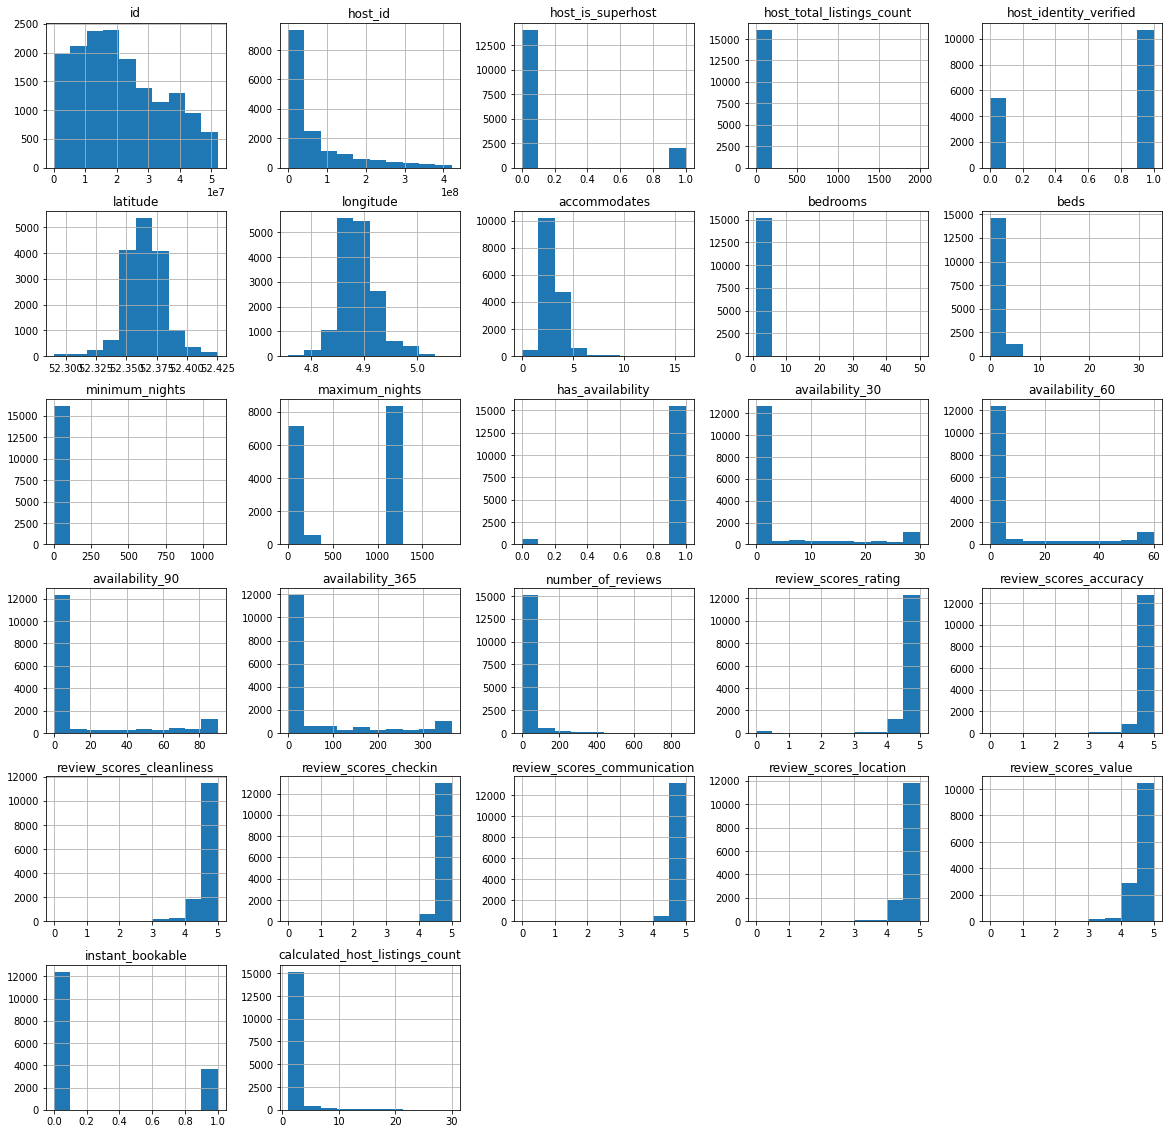

In [11]:
# Replacing columns with f/t with 0/1
listings_clean_df.replace({'f': 0, 't': 1}, inplace=True)

# Plotting the distribution of numerical and boolean categories
listings_clean_df.hist(figsize=(20,20));

In [12]:
listings_clean_df.columns

Index(['id', 'host_id', 'host_since', 'host_is_superhost',
       'host_neighbourhood', 'host_total_listings_count',
       'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count'],
      dtype='object')

Checking for the amount of null values in data from the reviews and calender file 

In [13]:
reviews_clean_df.isna().sum() #displaying the count of null values of each column from reviews data 

listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
dtype: int64

Since we don't have any null values in the reviews file, we can proceed furthur with it. 

In [14]:
calendar_full_df.isna().sum() #displaying the count of null values of each column from calender data

listing_id          0
date                0
available           0
price             195
adjusted_price    195
minimum_nights      4
maximum_nights      4
dtype: int64

### Data Wrangling 

#### Reassigning property types

In the listing data, there are multiple property types assigned to the listings. Some of the same property types are considered to be different because of the format of the data, and some entries also include the room types (ex. Private room in rental unit). We will remove the room types and assign new categories to the property types. Some of the entries do not have any specific property type, so they are changed to 'unknown'.

In [15]:
listings_clean_df['property_type']

0              Private room in rental unit
1                Private room in townhouse
2                       Entire rental unit
3                Private room in houseboat
4              Private room in rental unit
                       ...                
16111                   Entire rental unit
16112                   Entire rental unit
16113                   Entire rental unit
16114    Private room in bed and breakfast
16115           Entire condominium (condo)
Name: property_type, Length: 16116, dtype: object

In [16]:
listings_clean_df['property_type']
#rename one column and extract the property part
listings_clean_df['property_type1'] = listings_clean_df['property_type'].str.split(' in ').str[-1]
#unify all type of properties
listings_clean_df['property_type1'] = listings_clean_df['property_type1'].str.lower()
#remove the part which is overlapped with other columns
listings_clean_df['property_type1'] = listings_clean_df['property_type1'].str.replace('entire','').str.replace('tiny','')
#remove the unrelated property
listings_clean_df['property_type1'] = listings_clean_df['property_type1'].str.replace('bed and breakfast','unknown')
#private room doesnot present the property ,so transfer it into unknown
listings_clean_df['property_type1'] = listings_clean_df['property_type1'].str.replace('private room','unknown').str.strip()
listings_clean_df['property_type1'].unique()

array(['rental unit', 'townhouse', 'houseboat', 'guest suite', 'boat',
       'unknown', 'residential home', 'loft', 'guesthouse',
       'boutique hotel', 'condominium (condo)', 'serviced apartment',
       'farm stay', 'chalet', 'bungalow', 'island', 'villa', 'house',
       'barn', 'cabin', 'hotel', 'cottage', 'place', 'aparthotel',
       'floor', 'dome house', 'earth house', 'home/apt', 'nature lodge',
       'casa particular', 'campsite', 'hostel', 'yurt', 'bus', 'tipi',
       'camper/rv', 'cave', 'tower'], dtype=object)

In [17]:
#recategorizing the property types
listings_clean_df.property_type1.replace({
    'rental unit':'house',
    'townhouse':'house', 
    'houseboat':'boat',
    'guest suite':'suite', 
    'boat':'boat',
    'residential home':'house', 
    'guesthouse':'hotel',
    'boutique hotel':'hotel', 
    'condominium (condo)':'apartment', 
    'serviced apartment':'apartment',
    'chalet':'tiny house', 
    'bungalow':'tiny house', 
    'barn':'farm', 
    'cottage':'cabin', 
    'place':'house',
    'aparthotel':'apartment',
    'floor':'tiny house',
    'dome house':'house', 
    'earth house':'house',
    'home/apt':'apartment',
    'nature lodge':'cabin',
    'casa particular':'particular', 
    'campsite':'camp',
    'hostel':'hotel',
    'yurt':'camp',
    'bus':'bus',
    'tipi':'camp',
    'camper/rv':'camp',
    'cave':'cave', 
    'tower':'tower'
        },inplace = True)

listings_clean_df.head()

,id,host_id,host_since,host_is_superhost,host_neighbourhood,host_total_listings_count,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,property_type1
0,2818,3159,2008-09-24,1.0,Indische Buurt,1.0,1.0,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,52.36435,...,4.89,4.93,5.00,4.97,4.97,4.68,4.81,1,1,house
1,20168,59484,2009-12-02,0.0,Grachtengordel,2.0,1.0,"Amsterdam, North Holland, Netherlands",Centrum-Oost,52.36407,...,4.44,4.69,4.79,4.63,4.62,4.87,4.49,1,2,house
2,25428,56142,2009-11-20,1.0,Grachtengordel,2.0,0.0,NaN,Centrum-West,52.37490,...,5.00,5.00,5.00,5.00,5.00,5.00,4.80,0,1,house
3,27886,97647,2010-03-23,1.0,Westelijke Eilanden,1.0,1.0,"Amsterdam, North Holland, Netherlands",Centrum-West,52.38761,...,4.95,4.93,4.96,4.95,4.92,4.90,4.80,1,1,boat
4,28871,124245,2010-05-13,1.0,Amsterdam Centrum,2.0,1.0,"Amsterdam, North Holland, Netherlands",Centrum-West,52.36775,...,4.87,4.94,4.89,4.97,4.94,4.97,4.82,0,2,house


#### Formatting host history

All the data in the 'host_since' column should be dates. We will verify the pattern using regex. 

In [18]:
#matching pattern using regex and storing data with different format wrong_format
pattern = '\d{4}-\d{1,2}-\d{1,2}'
wrong_format = listings_clean_df[listings_clean_df['host_since'].str.match(pattern) == False]

#get the number of rows
wrong_format.shape[0]

0

Since there were no data in the wrong format, we can transfer the column into datetime format.
In the following snippet, we have converted the column into a measure of the number of the days that the host has been on the platform.
The data was scraped at 2021/09/07, so the active days of host will be calculated upto this date.

In [19]:
# Convert to datetime
listings_clean_df.host_since = pd.to_datetime(listings_clean_df.host_since) 

# Calculate the number of days
scrape_dt = dt.datetime(year=2021,day=7,month=9)
listings_clean_df['host_days_active'] = (scrape_dt - listings_clean_df.host_since)

listings_clean_df.head(5)

,id,host_id,host_since,host_is_superhost,host_neighbourhood,host_total_listings_count,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,property_type1,host_days_active
0,2818,3159,2008-09-24,1.0,Indische Buurt,1.0,1.0,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,52.36435,...,4.93,5.00,4.97,4.97,4.68,4.81,1,1,house,4731 days
1,20168,59484,2009-12-02,0.0,Grachtengordel,2.0,1.0,"Amsterdam, North Holland, Netherlands",Centrum-Oost,52.36407,...,4.69,4.79,4.63,4.62,4.87,4.49,1,2,house,4297 days
2,25428,56142,2009-11-20,1.0,Grachtengordel,2.0,0.0,NaN,Centrum-West,52.37490,...,5.00,5.00,5.00,5.00,5.00,4.80,0,1,house,4309 days
3,27886,97647,2010-03-23,1.0,Westelijke Eilanden,1.0,1.0,"Amsterdam, North Holland, Netherlands",Centrum-West,52.38761,...,4.93,4.96,4.95,4.92,4.90,4.80,1,1,boat,4186 days
4,28871,124245,2010-05-13,1.0,Amsterdam Centrum,2.0,1.0,"Amsterdam, North Holland, Netherlands",Centrum-West,52.36775,...,4.94,4.89,4.97,4.94,4.97,4.82,0,2,house,4135 days


#### Format the bathroom_text column

We found that the data in the bathroom_text column is in different formats where the number of bathrooms and type are combined together. Some of the numbers are in numeric format whereas others are descriptive. We will replace the descriptive values and then split them into separate columns with numbers and types of bathrooms.

In [20]:
#check the unique data
listings_clean_df['bathrooms_text'].unique()

array(['1.5 shared baths', '1 private bath', '1 bath', '1.5 baths',
       '1 shared bath', nan, '2 baths', '2.5 baths', '0 baths',
       'Private half-bath', '3.5 baths', '3 baths', '4 shared baths',
       '0 shared baths', 'Half-bath', '2 shared baths', '4 baths',
       '3 shared baths', 'Shared half-bath', '6 baths', '8 baths',
       '5 baths', '2.5 shared baths', '3.5 shared baths', '5.5 baths',
       '13 baths', '4.5 baths'], dtype=object)

We will create a dictionary to format the data to "number shared/private bath/baths".

In [21]:
# half and shared are changed to 0.5 in the dictionary
translation = {'Private half-bath': '0.5 private baths', 'Half-bath': '0.5 baths', 'Shared half-bath': '0.5 shared baths'}

#bathrooms_text data are replaced from the values from translation dictionary
listings_clean_df['bathrooms_text_format'] = listings_clean_df['bathrooms_text'].replace(translation)

In [22]:
#check the unique data to ensure the text is well formatted
listings_clean_df['bathrooms_text_format'].unique()

array(['1.5 shared baths', '1 private bath', '1 bath', '1.5 baths',
       '1 shared bath', nan, '2 baths', '2.5 baths', '0 baths',
       '0.5 private baths', '3.5 baths', '3 baths', '4 shared baths',
       '0 shared baths', '0.5 baths', '2 shared baths', '4 baths',
       '3 shared baths', '0.5 shared baths', '6 baths', '8 baths',
       '5 baths', '2.5 shared baths', '3.5 shared baths', '5.5 baths',
       '13 baths', '4.5 baths'], dtype=object)

Splitting columns into bathrooms_number to store the number of the bathroom, and bathrooms_type to store the type of the bathroom, and replacing nan and no bathroom type data into unknown.

In [23]:
listings_clean_df['bathrooms_number'] = listings_clean_df['bathrooms_text_format'].str.split(' ').str[0]
listings_clean_df['bathrooms_type'] = listings_clean_df['bathrooms_text_format'].str.split(' ').str[1]
listings_clean_df['bathrooms_type'] = listings_clean_df['bathrooms_type'].replace(['bath','baths', np.nan], 'unknown')
listings_clean_df.head()

,id,host_id,host_since,host_is_superhost,host_neighbourhood,host_total_listings_count,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,property_type1,host_days_active,bathrooms_text_format,bathrooms_number,bathrooms_type
0,2818,3159,2008-09-24,1.0,Indische Buurt,1.0,1.0,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,52.36435,...,4.97,4.68,4.81,1,1,house,4731 days,1.5 shared baths,1.5,shared
1,20168,59484,2009-12-02,0.0,Grachtengordel,2.0,1.0,"Amsterdam, North Holland, Netherlands",Centrum-Oost,52.36407,...,4.62,4.87,4.49,1,2,house,4297 days,1 private bath,1,private
2,25428,56142,2009-11-20,1.0,Grachtengordel,2.0,0.0,NaN,Centrum-West,52.37490,...,5.00,5.00,4.80,0,1,house,4309 days,1 bath,1,unknown
3,27886,97647,2010-03-23,1.0,Westelijke Eilanden,1.0,1.0,"Amsterdam, North Holland, Netherlands",Centrum-West,52.38761,...,4.92,4.90,4.80,1,1,boat,4186 days,1.5 baths,1.5,unknown
4,28871,124245,2010-05-13,1.0,Amsterdam Centrum,2.0,1.0,"Amsterdam, North Holland, Netherlands",Centrum-West,52.36775,...,4.94,4.97,4.82,0,2,house,4135 days,1 shared bath,1,shared


#### Process amenities available in listings

In [24]:
df_amenities = listings_clean_df[['id','amenities']].copy() # create a new df to process amenities
df_amenities

,id,amenities
0,2818,"[""Single level home"", ""Coffee maker"", ""Long te..."
1,20168,"[""Hot water"", ""TV"", ""Hangers"", ""Essentials"", ""..."
2,25428,"[""Cable TV"", ""Coffee maker"", ""Long term stays ..."
3,27886,"[""Coffee maker"", ""Long term stays allowed"", ""P..."
4,28871,"[""Hot water"", ""Shampoo"", ""Dryer"", ""Hangers"", ""..."
...,...,...
16111,52001423,"[""Washer"", ""Fire extinguisher"", ""First aid kit..."
16112,52016670,"[""Game console: PS4"", ""Coffee maker"", ""Boat sl..."
16113,52018685,"[""TV"", ""Shampoo"", ""Hangers"", ""Essentials"", ""Fi..."
16114,52050333,"[""Coffee maker"", ""Free parking on premises"", ""..."


In [25]:
df_amenities.loc[:,'list_amenities'] = df_amenities.amenities.apply(eval) # create a new column that contain list version amenities
df_amenities

,id,amenities,list_amenities
0,2818,"[""Single level home"", ""Coffee maker"", ""Long te...","[Single level home, Coffee maker, Long term st..."
1,20168,"[""Hot water"", ""TV"", ""Hangers"", ""Essentials"", ""...","[Hot water, TV, Hangers, Essentials, Fire exti..."
2,25428,"[""Cable TV"", ""Coffee maker"", ""Long term stays ...","[Cable TV, Coffee maker, Long term stays allow..."
3,27886,"[""Coffee maker"", ""Long term stays allowed"", ""P...","[Coffee maker, Long term stays allowed, Patio ..."
4,28871,"[""Hot water"", ""Shampoo"", ""Dryer"", ""Hangers"", ""...","[Hot water, Shampoo, Dryer, Hangers, Coffee ma..."
...,...,...,...
16111,52001423,"[""Washer"", ""Fire extinguisher"", ""First aid kit...","[Washer, Fire extinguisher, First aid kit, Car..."
16112,52016670,"[""Game console: PS4"", ""Coffee maker"", ""Boat sl...","[Game console: PS4, Coffee maker, Boat slip, I..."
16113,52018685,"[""TV"", ""Shampoo"", ""Hangers"", ""Essentials"", ""Fi...","[TV, Shampoo, Hangers, Essentials, Fire exting..."
16114,52050333,"[""Coffee maker"", ""Free parking on premises"", ""...","[Coffee maker, Free parking on premises, Boat ..."


The following function returns a list of unique amenities in the series passed to it.

In [26]:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])
sorted(to_1D(df_amenities.list_amenities).unique())

[' linens',
 ' toiletries',
 '- body soap',
 '- conditioner',
 '.  Bluetooth sound system',
 '.  stainless steel gas stove',
 '. body soap',
 '. conditioner',
 '24" TV with Chromecast',
 '28" HDTV with Netflix',
 '30" TV with standard cable',
 '32" HDTV with Apple TV, Netflix, premium cable',
 '32" HDTV with Chromecast, Netflix, premium cable, standard cable',
 '32" HDTV with Chromecast, Netflix, standard cable',
 '32" HDTV with premium cable',
 '32" TV with Chromecast',
 '32" TV with standard cable',
 '35" HDTV with Apple TV',
 '36" HDTV with Chromecast, Netflix, standard cable',
 '36" TV with Apple TV, Netflix',
 '40" HDTV with Amazon Prime Video, Apple TV, Netflix',
 '40" HDTV with Netflix',
 '40" HDTV with Netflix, premium cable, standard cable',
 '41" HDTV with Netflix, standard cable',
 '42" HDTV',
 '42" HDTV with Amazon Prime Video, Netflix, standard cable',
 '42" HDTV with Chromecast',
 '42" HDTV with Chromecast, Netflix',
 '42" HDTV with Chromecast, Netflix, standard cable',
 

In [27]:
# show the frequency of the amenities
(to_1D(df_amenities.list_amenities).value_counts()/df_amenities.shape[0])

Wifi                                           0.972388
Essentials                                     0.961343
Heating                                        0.946575
Kitchen                                        0.882911
Smoke alarm                                    0.803177
                                                 ...   
36" TV with Apple TV, Netflix                  0.000062
32" TV with standard cable                     0.000062
Syos conditioner                               0.000062
Marie Stella conditioner                       0.000062
Clothing storage: walk-in closet and closet    0.000062
Length: 831, dtype: float64

In addition to the differences in the importance of amenities, there are also great differences in the frequency of amenities. Some amenities are almost necessary (extremely frequent), while others are very rare.

In this project, amenities are classified and extracted, and only relatively important amenities/amenity groups are taken out. At this stage, the importance of amenities does not come from any mathematical calculation but is based on common sense and daily inference. The extracted amenities will be further studied and screened in the next stage. Many too few or too many facility groups will not be used as meaningful price influencing factors because they do not provide sufficient diversity.

- Internet,wifi
- Amazon Prime Video,sound system,Apple TV,Game console,Netflix,HDTV,bluetooth
- Air conditioning
- Cooking,Kitchen,oven,Stove
- Elevator
- Dedicated workspace
- Gym,Fitness center
- Parking
- Children
- Safe,Security system,Smoke alarm,Smart lock
- breakfast

In [28]:
df_amenities.loc[df_amenities['amenities'].str.contains('Internet|wifi',flags=re.IGNORECASE), 'internet'] = True
df_amenities.loc[df_amenities['amenities'].str.contains('Amazon Prime Video|sound system|Apple TV|Game console|Netflix|HDTV|bluetooth',flags=re.IGNORECASE), 'recreation'] = True
df_amenities.loc[df_amenities['amenities'].str.contains('Air conditioning',flags=re.IGNORECASE), 'air_conditioning'] = True
df_amenities.loc[df_amenities['amenities'].str.contains('Cooking|Kitchen|oven|Stove',flags=re.IGNORECASE), 'cook'] = True
df_amenities.loc[df_amenities['amenities'].str.contains('Elevator',flags=re.IGNORECASE), 'elevator'] = True
df_amenities.loc[df_amenities['amenities'].str.contains('Dedicated workspace',flags=re.IGNORECASE), 'work'] = True
df_amenities.loc[df_amenities['amenities'].str.contains('Gym|Fitness center',flags=re.IGNORECASE), 'gym'] = True
df_amenities.loc[df_amenities['amenities'].str.contains('Parking',flags=re.IGNORECASE), 'parking'] = True
df_amenities.loc[df_amenities['amenities'].str.contains('Children',flags=re.IGNORECASE), 'children'] = True
df_amenities.loc[df_amenities['amenities'].str.contains('Safe|Security system|Smart lock',flags=re.IGNORECASE), 'secure'] = True
df_amenities.loc[df_amenities['amenities'].str.contains('breakfast',flags=re.IGNORECASE), 'breakfast'] = True

df_amenities.fillna(False,inplace = True)
df_amenities.head()


,id,amenities,list_amenities,internet,recreation,air_conditioning,cook,elevator,work,gym,parking,children,secure,breakfast
0,2818,"[""Single level home"", ""Coffee maker"", ""Long te...","[Single level home, Coffee maker, Long term st...",True,False,False,False,False,True,False,True,False,False,False
1,20168,"[""Hot water"", ""TV"", ""Hangers"", ""Essentials"", ""...","[Hot water, TV, Hangers, Essentials, Fire exti...",True,False,False,False,False,True,False,True,False,False,False
2,25428,"[""Cable TV"", ""Coffee maker"", ""Long term stays ...","[Cable TV, Coffee maker, Long term stays allow...",True,False,False,True,True,True,False,False,False,False,False
3,27886,"[""Coffee maker"", ""Long term stays allowed"", ""P...","[Coffee maker, Long term stays allowed, Patio ...",True,False,False,False,False,True,False,False,False,True,True
4,28871,"[""Hot water"", ""Shampoo"", ""Dryer"", ""Hangers"", ""...","[Hot water, Shampoo, Dryer, Hangers, Coffee ma...",True,False,False,False,False,False,False,False,False,False,False


In [29]:
df_amenities.iloc[:,3:-1].sum()/df_amenities.shape[0] # show frequency of each amenities

internet            0.978531
recreation          0.052246
air_conditioning    0.069434
cook                0.894205
elevator            0.095867
work                0.673306
gym                 0.015078
parking             0.405994
children            0.097853
secure              0.034686
dtype: float64

It can be seen that more than 97% of properties are equipped with internet amenities, so the internet can not provide effective difference information. Therefore, we do not take the internet column as a valid column and drop it.

In [30]:
df_amenities.drop(columns = 'internet',inplace = True)

We will create a new column called score, whose value represents the number of supporting facilities selected above. For example, if one's amenities only contains Elevator and Smart lock, its score will be 2.

In [31]:
df_amenities['score'] = df_amenities.loc[:,['recreation','air_conditioning','cook','secure','elevator','work','gym','parking','children','secure','breakfast']].sum(axis = 1)
listings_clean_df['amenities_score'] = df_amenities['score']


#### Process review ratings

The listings without reviews will be replaced with 'no reviews'. The remaining ratings will be grouped into bins. To determine the useful bins we create histograms to display the distribution of ratings for all the review ratings columns.

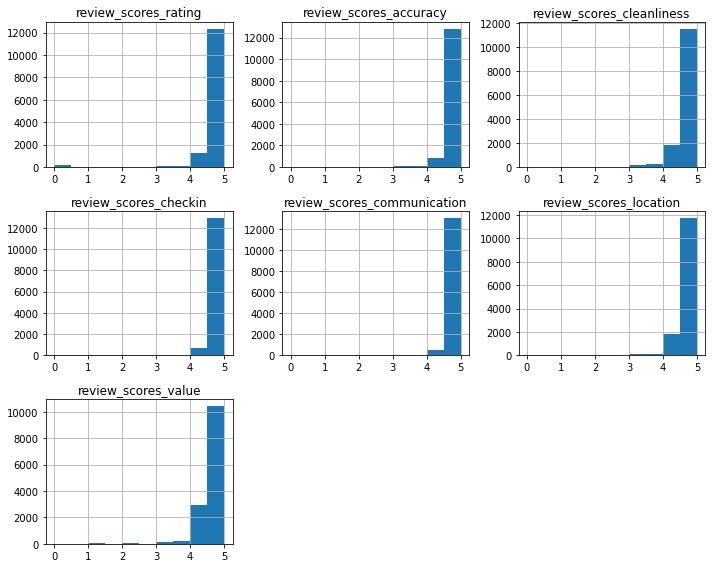

In [32]:
# Checking the distribution of the review ratings columns
review_cols_to_plot = list(listings_clean_df.columns[listings_clean_df.columns.str.startswith("review_scores") == True])
fig = plt.figure(figsize=(10,8))
for i, col_name in enumerate(review_cols_to_plot):
    ax = fig.add_subplot(3,3,i+1)
    listings_clean_df[col_name].hist(bins=10,ax=ax)
    ax.set_title(col_name)
fig.tight_layout()
plt.show()

From the above histograms we can see that most of the ratings are 4/5 or 5/5. Therefore, the ratings 4/5 and 5/5 will be separately grouped and all the remaining ratings will be grouped together into a single bin. 

In [33]:
# Binning for all the review ratings columns
bins=[0, 3, 4, 5]
labels=['0-3/5', '4/5', '5/5']
na_label='no reviews'
for col in review_cols_to_plot:
    listings_clean_df[col] = pd.cut(listings_clean_df[col], bins=bins, labels=labels, include_lowest=True)
    listings_clean_df[col] = listings_clean_df[col].astype('str')
    listings_clean_df[col].fillna(na_label, inplace=True)
    

In [34]:
listings_clean_df.columns

Index(['id', 'host_id', 'host_since', 'host_is_superhost',
       'host_neighbourhood', 'host_total_listings_count',
       'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count', 'property_type1', 'host_days_active',
       'bathrooms_text_format', 'bathrooms_number', 'bathrooms_type',
       'amenities_score'],
      dtype='object')

# Machine Learning part

Since the prediction target price is a continuous and specific value, we should use regression model other than classification model.

### Data Processing

#### Convert columns 'price','bathrooms_number','review_scores_value' from str to int

In [35]:
listings_clean_df.price = listings_clean_df.price.str.replace('$','',regex = False).str.replace(',','').astype(float)
listings_clean_df.bathrooms_number = listings_clean_df.bathrooms_number.fillna(0.0).astype(float)
listings_clean_df.review_scores_value = listings_clean_df.review_scores_value.replace('no reviews',np.nan,regex = False).replace({'0-3/5':1, '4/5':2, '5/5':3}).astype(float)
listings_clean_df.review_scores_location = listings_clean_df.review_scores_location.replace('no reviews',np.nan,regex = False).replace({'0-3/5':1, '4/5':2, '5/5':3}).astype(float)
listings_clean_df.review_scores_communication = listings_clean_df.review_scores_communication.replace('no reviews',np.nan,regex = False).replace({'0-3/5':1, '4/5':2, '5/5':3}).astype(float)
listings_clean_df.review_scores_checkin = listings_clean_df.review_scores_checkin.replace('no reviews',np.nan,regex = False).replace({'0-3/5':1, '4/5':2, '5/5':3}).astype(float)
listings_clean_df.review_scores_cleanliness = listings_clean_df.review_scores_cleanliness.replace('no reviews',np.nan,regex = False).replace({'0-3/5':1, '4/5':2, '5/5':3}).astype(float)
listings_clean_df.review_scores_accuracy = listings_clean_df.review_scores_accuracy.replace('no reviews',np.nan,regex = False).replace({'0-3/5':1, '4/5':2, '5/5':3}).astype(float)
listings_clean_df.review_scores_rating = listings_clean_df.review_scores_rating.replace('no reviews',np.nan,regex = False).replace({'0-3/5':1, '4/5':2, '5/5':3}).astype(float)


listings_clean_df.review_scores_value.fillna(listings_clean_df.review_scores_value.mean(),inplace = True)



### show data type of each attribute.

In [36]:
numerical_columns = [col for col in listings_clean_df.columns if type(listings_clean_df.loc[0,col]) in [np.int64, float, np.float64]]
str_columns = [col for col in listings_clean_df.columns if type(listings_clean_df.loc[0,col]) is str]
numerical_columns

['id',
 'host_id',
 'host_is_superhost',
 'host_total_listings_count',
 'host_identity_verified',
 'latitude',
 'longitude',
 'accommodates',
 'bedrooms',
 'beds',
 'price',
 'minimum_nights',
 'maximum_nights',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable',
 'calculated_host_listings_count',
 'bathrooms_number',
 'amenities_score']

In [37]:
str_columns

['host_neighbourhood',
 'neighbourhood',
 'neighbourhood_cleansed',
 'property_type',
 'room_type',
 'bathrooms_text',
 'amenities',
 'property_type1',
 'bathrooms_text_format',
 'bathrooms_type']

#### Process numerical columns with removing nan value

In [38]:
selected_feature_df = listings_clean_df.drop(columns = ['id','host_id'])
selected_feature_df.host_is_superhost.fillna(0,inplace = True)
selected_feature_df.host_identity_verified.fillna(0,inplace = True)
selected_feature_df.host_total_listings_count.fillna(1,inplace = True)
selected_feature_df.beds.fillna(listings_clean_df.beds.mean(),inplace = True)
selected_feature_df.columns

Index(['host_since', 'host_is_superhost', 'host_neighbourhood',
       'host_total_listings_count', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count', 'property_type1', 'host_days_active',
       'bathrooms_text_format', 'bathrooms_number', 'bathrooms_type',
       'amenities_score'],
      dtype='object')

In [39]:
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn import linear_model
from tqdm import tqdm_notebook as tqdm
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV


### Correlation Analysis And Redundancies

<AxesSubplot:>

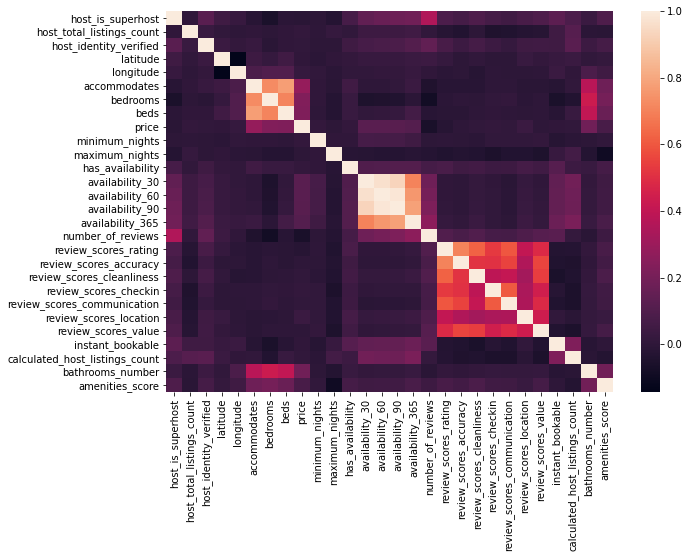

In [40]:
plt.figure(figsize = (10,7))
sns.heatmap(selected_feature_df.corr())

In [41]:
### Remove features with high correlation

In [42]:
selected_feature_df.drop(columns = ['availability_30','availability_60','availability_90','bedrooms','review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication'],inplace = True)
selected_feature_df.columns

Index(['host_since', 'host_is_superhost', 'host_neighbourhood',
       'host_total_listings_count', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'beds', 'amenities',
       'price', 'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_365', 'number_of_reviews', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count', 'property_type1', 'host_days_active',
       'bathrooms_text_format', 'bathrooms_number', 'bathrooms_type',
       'amenities_score'],
      dtype='object')

### Outliers and Skewness Detection

In [43]:
selected_feature_df = selected_feature_df[selected_feature_df['price'] != 0.0]

array([[<AxesSubplot:title={'center':'host_since'}>,
        <AxesSubplot:title={'center':'host_is_superhost'}>,
        <AxesSubplot:title={'center':'host_total_listings_count'}>,
        <AxesSubplot:title={'center':'host_identity_verified'}>],
       [<AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'accommodates'}>,
        <AxesSubplot:title={'center':'beds'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'minimum_nights'}>,
        <AxesSubplot:title={'center':'maximum_nights'}>,
        <AxesSubplot:title={'center':'has_availability'}>],
       [<AxesSubplot:title={'center':'availability_365'}>,
        <AxesSubplot:title={'center':'number_of_reviews'}>,
        <AxesSubplot:title={'center':'review_scores_location'}>,
        <AxesSubplot:title={'center':'review_scores_value'}>],
       [<AxesSubplot:title={'center':'instant_bookable'}>,
        <AxesSubplo

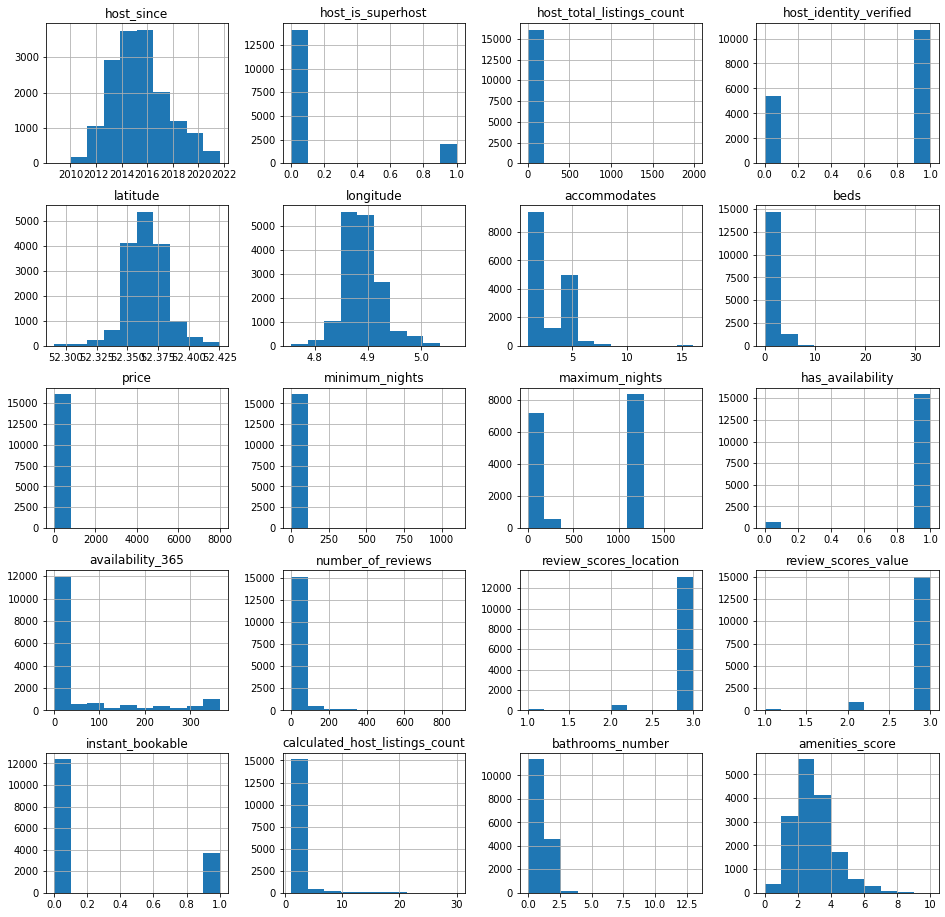

In [44]:
selected_feature_df.hist(figsize=(16,16))

In [45]:
transformed_df = selected_feature_df.copy()
right_skew = ['host_total_listings_count','accommodates',
                    'beds','price','minimum_nights',
                    'availability_365',
                   'number_of_reviews','calculated_host_listings_count']

for col in right_skew:
    transformed_df[col] = selected_feature_df[col].replace(0.0, 0.001) # Replacing 0s with 0.01
    transformed_df[col] = np.log(transformed_df[col])

array([[<AxesSubplot:title={'center':'host_since'}>,
        <AxesSubplot:title={'center':'host_is_superhost'}>,
        <AxesSubplot:title={'center':'host_total_listings_count'}>,
        <AxesSubplot:title={'center':'host_identity_verified'}>],
       [<AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'accommodates'}>,
        <AxesSubplot:title={'center':'beds'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'minimum_nights'}>,
        <AxesSubplot:title={'center':'maximum_nights'}>,
        <AxesSubplot:title={'center':'has_availability'}>],
       [<AxesSubplot:title={'center':'availability_365'}>,
        <AxesSubplot:title={'center':'number_of_reviews'}>,
        <AxesSubplot:title={'center':'review_scores_location'}>,
        <AxesSubplot:title={'center':'review_scores_value'}>],
       [<AxesSubplot:title={'center':'instant_bookable'}>,
        <AxesSubplo

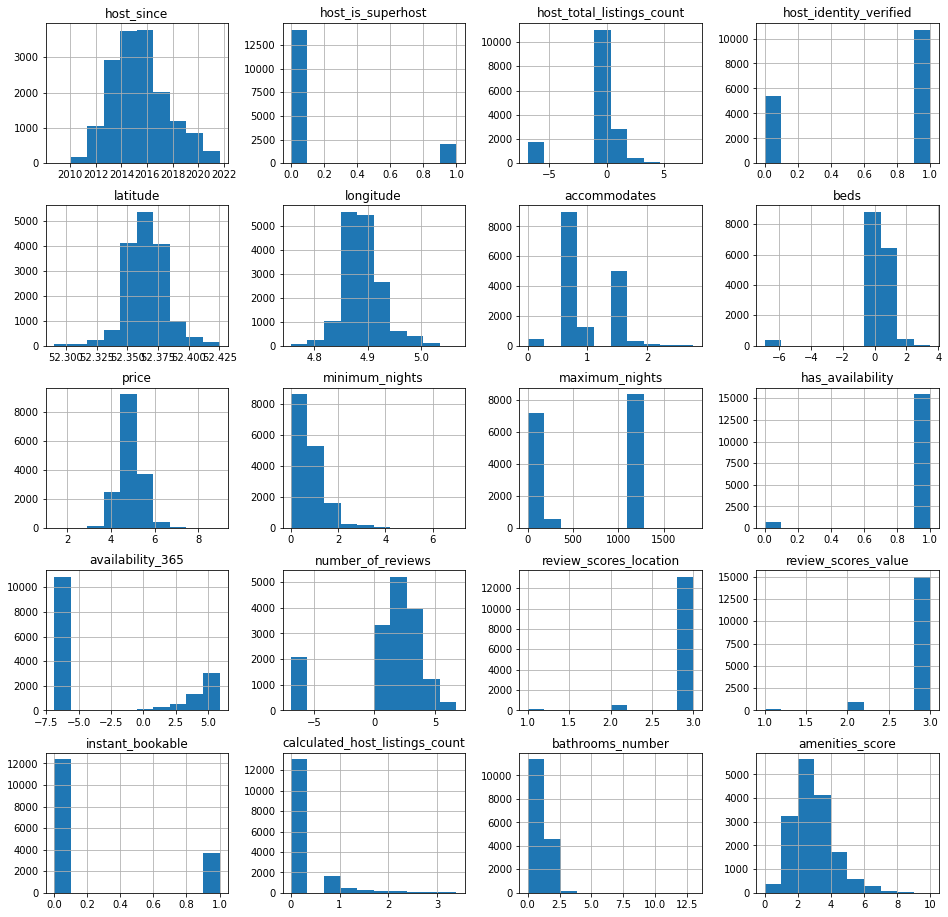

In [46]:
transformed_df.hist(figsize=(16,16))

In [47]:
# to delete
transformed_df.isnull().any()

host_since                         True
host_is_superhost                 False
host_neighbourhood                 True
host_total_listings_count         False
host_identity_verified            False
neighbourhood                      True
neighbourhood_cleansed            False
latitude                          False
longitude                         False
property_type                     False
room_type                         False
accommodates                      False
bathrooms_text                     True
beds                              False
amenities                         False
price                             False
minimum_nights                    False
maximum_nights                    False
has_availability                  False
availability_365                  False
number_of_reviews                 False
review_scores_location             True
review_scores_value               False
instant_bookable                  False
calculated_host_listings_count    False


In [48]:
transformed_df.drop(columns = ['host_since','host_neighbourhood','neighbourhood','bathrooms_text','host_days_active','property_type','amenities','bathrooms_text_format'],inplace = True)

transformed_df.drop(columns ='review_scores_location',inplace = True)


In [49]:
transformed_df

,host_is_superhost,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,beds,price,...,has_availability,availability_365,number_of_reviews,review_scores_value,instant_bookable,calculated_host_listings_count,property_type1,bathrooms_number,bathrooms_type,amenities_score
0,1.0,0.000000,1.0,Oostelijk Havengebied - Indische Buurt,52.364350,4.943580,Private room,0.693147,0.693147,4.077537,...,1,4.820282,5.634790,3.00000,1,0.000000,house,1.5,shared,2
1,0.0,0.693147,1.0,Centrum-Oost,52.364070,4.893930,Private room,0.693147,0.000000,4.663439,...,1,-6.907755,5.826000,3.00000,1,0.693147,house,1.0,private,2
2,1.0,0.693147,0.0,Centrum-West,52.374900,4.884870,Entire home/apt,1.098612,0.000000,4.828314,...,1,4.043051,1.609438,3.00000,0,0.000000,house,1.0,unknown,3
3,1.0,0.000000,1.0,Centrum-West,52.387610,4.891880,Private room,0.693147,0.000000,4.948760,...,1,4.189655,5.407172,3.00000,1,0.000000,boat,1.5,unknown,4
4,1.0,0.693147,1.0,Centrum-West,52.367750,4.890920,Private room,0.693147,0.000000,4.317488,...,1,5.697093,5.866468,3.00000,0,0.693147,house,1.0,shared,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16111,0.0,-6.907755,1.0,De Baarsjes - Oud-West,52.359864,4.856234,Entire home/apt,1.098612,0.000000,4.605170,...,1,3.784190,0.000000,3.00000,0,0.000000,house,1.5,unknown,2
16112,0.0,-6.907755,1.0,Oud-Oost,52.358310,4.905953,Entire home/apt,1.386294,1.098612,5.552960,...,1,3.091042,-6.907755,2.90541,0,0.000000,house,2.0,unknown,8
16113,0.0,2.890372,1.0,Centrum-West,52.365632,4.881139,Entire home/apt,1.386294,0.693147,5.187386,...,1,1.098612,-6.907755,2.90541,1,2.944439,house,1.5,unknown,2
16114,0.0,-6.907755,1.0,Noord-Oost,52.420204,5.066508,Private room,0.693147,0.000000,4.477337,...,1,5.899897,-6.907755,2.90541,1,0.000000,unknown,1.0,private,4


In [55]:
for col in transformed_df.columns:
    print(col,type(transformed_df[col][0]))

host_is_superhost <class 'numpy.float64'>
host_total_listings_count <class 'numpy.float64'>
host_identity_verified <class 'numpy.float64'>
neighbourhood_cleansed <class 'str'>
latitude <class 'numpy.float64'>
longitude <class 'numpy.float64'>
room_type <class 'str'>
accommodates <class 'numpy.float64'>
beds <class 'numpy.float64'>
price <class 'numpy.float64'>
minimum_nights <class 'numpy.float64'>
maximum_nights <class 'numpy.int64'>
has_availability <class 'numpy.int64'>
availability_365 <class 'numpy.float64'>
number_of_reviews <class 'numpy.float64'>
review_scores_value <class 'numpy.float64'>
instant_bookable <class 'numpy.int64'>
calculated_host_listings_count <class 'numpy.float64'>
property_type1 <class 'str'>
bathrooms_number <class 'numpy.float64'>
bathrooms_type <class 'str'>
amenities_score <class 'numpy.int64'>


In [59]:
def onehotEncode_and_bind(original_df, features):
    res = original_df
    for f in features:
        dummies = pd.get_dummies(original_df[[f]])
        res = pd.concat([res, dummies], axis=1)
        res = res.drop([f], axis=1)
    return res 

encoded_df = onehotEncode_and_bind(transformed_df,['room_type','property_type1','bathrooms_type','neighbourhood_cleansed'])

### Separate independent variables and predictive variable

In [62]:
X = encoded_df.drop('price', axis=1)
y = encoded_df.price

### Sampling: Split dataset into train and test sets

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train

,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,accommodates,beds,minimum_nights,maximum_nights,has_availability,...,neighbourhood_cleansed_Noord-Oost,neighbourhood_cleansed_Noord-West,neighbourhood_cleansed_Oostelijk Havengebied - Indische Buurt,neighbourhood_cleansed_Osdorp,neighbourhood_cleansed_Oud-Noord,neighbourhood_cleansed_Oud-Oost,neighbourhood_cleansed_Slotervaart,neighbourhood_cleansed_Watergraafsmeer,neighbourhood_cleansed_Westerpark,neighbourhood_cleansed_Zuid
4175,0.0,0.000000,1.0,52.36414,4.93734,0.693147,0.000000,0.693147,1125,1,...,0,0,1,0,0,0,0,0,0,0
11698,1.0,0.000000,0.0,52.37024,4.91196,0.693147,0.693147,0.000000,1125,1,...,0,0,0,0,0,0,0,0,0,0
6680,0.0,0.000000,0.0,52.35288,4.88433,1.386294,1.098612,0.693147,1125,1,...,0,0,0,0,0,0,0,0,0,1
7289,0.0,0.000000,1.0,52.34558,4.89679,1.386294,1.098612,1.098612,1125,1,...,0,0,0,0,0,0,0,0,0,0
15415,0.0,-6.907755,0.0,52.36923,4.90604,2.079442,2.079442,0.000000,365,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,0.0,0.000000,1.0,52.36411,4.86245,0.693147,0.000000,0.693147,2,1,...,0,0,0,0,0,0,0,0,0,0
5192,0.0,0.000000,0.0,52.35497,4.88855,0.693147,0.000000,0.000000,7,1,...,0,0,0,0,0,0,0,0,0,0
12172,1.0,1.098612,1.0,52.36655,4.90930,1.386294,0.693147,0.693147,1125,1,...,0,0,0,0,0,0,0,0,0,0
235,0.0,0.000000,0.0,52.37577,4.86126,0.693147,0.000000,0.693147,9,1,...,0,0,0,0,0,0,0,0,0,0


### Linear Regression Model

In [64]:
reg_ln = LinearRegression()  
reg_ln.fit(X_train, y_train)
y_pred_test = reg_ln.predict(X_test)
y_pred_train = reg_ln.predict(X_train)

In [65]:
print("Training RMSE:", np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)),4)
print("Validation RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)),4)

print("\nTraining MSE:", metrics.mean_squared_error(y_train, y_pred_train))
print("Validation MSE:", metrics.mean_squared_error(y_test, y_pred_test))

print("\nTraining r2:", metrics.r2_score(y_train,  y_pred_train),4)
print("Validation r2:", metrics.r2_score(y_test, y_pred_test),4)

# reg_ln.score(X_train, y_train) = metrics.r2_score(y_train,  y_pred_train)

print("\nTraining adj r2:",1 - (1-reg_ln.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print("Validation adj r2:",1 - (1-reg_ln.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
      

Training RMSE: 0.38221999342845936 4
Validation RMSE: 0.3804006544472443 4

Training MSE: 0.14609212337645153
Validation MSE: 0.14470465790389178

Training r2: 0.4807265466119063 4
Validation r2: 0.47552002547190775 4

Training adj r2: 0.4781332184014624
Validation adj r2: 0.4648841831494116


### Random Forest Tree Regressor

In [66]:
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

y_pred_test = reg_rf.predict(X_test)
y_pred_train = reg_rf.predict(X_train)

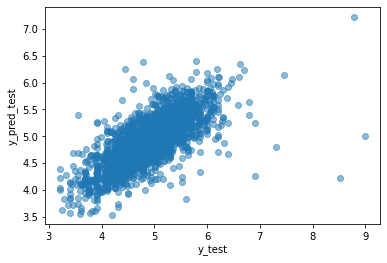

In [69]:
plt.scatter(y_test, y_pred_test, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred_test")
plt.show()

In [70]:
print("Training RMSE:", round(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)),4))
print("Validation RMSE:", round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)),4))

print("\nTraining MSE:", metrics.mean_squared_error(y_train, y_pred_train))
print("Validation MSE:", metrics.mean_squared_error(y_test, y_pred_test))

print("\nTraining r2:", metrics.r2_score(y_train,  y_pred_train),4)
print("Validation r2:", metrics.r2_score(y_test, y_pred_test),4)

print("\nTraining adj r2:",1 - (1-reg_rf.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print("Validation adj r2:",1 - (1-reg_rf.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))



Training RMSE: 0.1398
Validation RMSE: 0.3661

Training MSE: 0.01953623961819136
Validation MSE: 0.13400159564294883

Training r2: 0.9305599071442429 4
Validation r2: 0.5143131224136819 4

Training adj r2: 0.09617492739480582
Validation adj r2: 0.10143574984548887


### Hyperparameter Tuning

In [75]:
param_grid = {
    # Number of trees in random forest
    'n_estimators' : [100,200,500], 
    # Number of features to consider at every split
    'max_features' : ['auto', 'sqrt'],
    # Maximum number of levels in tree
    'max_depth' : [x for x in range(1,50,5)],
    # Minimum number of samples required at each leaf node
    'min_samples_leaf' : [2, 4, 10, 16],
} 
tuned_rf = RandomizedSearchCV(reg_rf, param_grid, scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2)


In [76]:
tuned_rf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=26, max_features=sqrt, min_samples_leaf=2, n_estimators=100; total time=   1.1s
[CV] END max_depth=26, max_features=sqrt, min_samples_leaf=2, n_estimators=100; total time=   1.1s
[CV] END max_depth=26, max_features=sqrt, min_samples_leaf=2, n_estimators=100; total time=   1.1s
[CV] END max_depth=26, max_features=sqrt, min_samples_leaf=2, n_estimators=100; total time=   1.1s
[CV] END max_depth=26, max_features=sqrt, min_samples_leaf=2, n_estimators=100; total time=   1.1s
[CV] END max_depth=26, max_features=auto, min_samples_leaf=2, n_estimators=100; total time=   5.4s
[CV] END max_depth=26, max_features=auto, min_samples_leaf=2, n_estimators=100; total time=   5.3s
[CV] END max_depth=26, max_features=auto, min_samples_leaf=2, n_estimators=100; total time=   5.4s
[CV] END max_depth=26, max_features=auto, min_samples_leaf=2, n_estimators=100; total time=   5.3s
[CV] END max_depth=26, max_features=auto, min_sa

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [1, 6, 11, 16, 21, 26, 31,
                                                      36, 41, 46],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 4, 10, 16],
                                        'n_estimators': [100, 200, 500]},
                   scoring='neg_mean_squared_error', verbose=2)

In [77]:
y_pred_test = tuned_rf.predict(X_test)
y_pred_train = tuned_rf.predict(X_train)


In [78]:
print("Training RMSE:", np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)),4)
print("Validation RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)),4)

print("\nTraining MSE:", metrics.mean_squared_error(y_train, y_pred_train))
print("Validation MSE:", metrics.mean_squared_error(y_test, y_pred_test))

print("\nTraining r2:", metrics.r2_score(y_train,  y_pred_train))
print("Validation r2:", metrics.r2_score(y_test, y_pred_test))

print("\nTraining adj r2:",1 - (1-reg_rf.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print("Validation adj r2:",1 - (1-reg_rf.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))


Training RMSE: 0.26082061852463617 4
Validation RMSE: 0.36362827481388416 4

Training MSE: 0.06802739504757378
Validation MSE: 0.13222552224412165

Training r2: 0.7582017460289463
Validation r2: 0.5207504751877411

Training adj r2: 0.09617492739480582
Validation adj r2: 0.10143574984548887


In [79]:
### SGD regressor

In [80]:
reg_sgd = SGDRegressor()

reg_sgd.fit(X_train, y_train)

y_pred_test = reg_sgd.predict(X_test)
y_pred_train = reg_sgd.predict(X_train)

In [81]:
# print("Training RMSE:", round(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)),4))
# print("Validation RMSE:", round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)),4))

# print("\nTraining MSE:", metrics.mean_squared_error(y_train, y_pred_train))
# print("Validation MSE:", metrics.mean_squared_error(y_test, y_pred_test))

# print("\nTraining r2:", metrics.r2_score(y_train,  y_pred_train),4)
# print("Validation r2:", metrics.r2_score(y_test, y_pred_test),4)

# print("\nTraining adj r2:",1 - (1-reg_rf.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
# print("Validation adj r2:",1 - (1-reg_rf.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

print(reg_sgd.score(X_train, y_train))


-8734632530176.643


### Nerual Network

In [82]:
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential

In [83]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 17))

# Adding the second hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer

model.add(Dense(units = 1))

#model.add(Dense(1))
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the ANN to the Training set
model.fit(X_train, y_train, batch_size = 10, epochs = 10)


Epoch 1/10


ValueError: in user code:

    /Users/han/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /Users/han/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/han/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/han/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/han/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/han/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /Users/han/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:754 train_step
        y_pred = self(x, training=True)
    /Users/han/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/han/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:259 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: expected axis -1 of input shape to have value 17 but received input with shape (10, 64)


In [ ]:
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred_test, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [ ]:
print("Training RMSE:", np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)),4)
print("Validation RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)),4)

print("\nTraining MSE:", metrics.mean_squared_error(y_train, y_pred_train))
print("Validation MSE:", metrics.mean_squared_error(y_test, y_pred_test))

print("\nTraining r2:", metrics.r2_score(y_train,  y_pred_train))
print("Validation r2:", metrics.r2_score(y_test, y_pred_test))

print("\nTraining adj r2:",1 - (1-reg_rf.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print("Validation adj r2:",1 - (1-reg_rf.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))